In [1]:
#imports 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np



In [2]:
#reading in the data 
nutrition_subset = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv")

nutrition_subset

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [3]:
#top 5 foods with highest saturated fats 
nutrition_subset.sort_values(by = ['saturated_fat'], ascending=False).iloc[0:5]

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


In [4]:
#creating saturated fats per gram coloum 
nutrition_subset['saturared_fat_per_gram'] = nutrition_subset.saturated_fat / nutrition_subset.weight_in_grams

#top 5 highest saturated fat per gram foods
nutrition_subset.sort_values(by=['saturared_fat_per_gram'], ascending=False).iloc[0:5]

,food item,weight_in_grams,saturated_fat,cholesterol,saturared_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


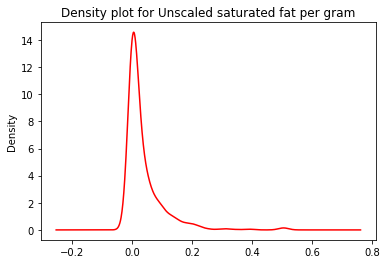

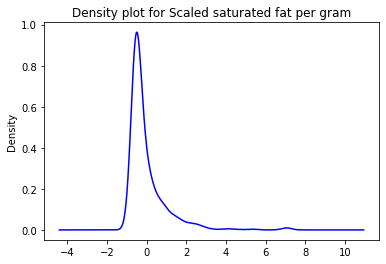

In [6]:
#plots
nutrition_subset['scaled_saturated_fat_per_gram'] = stats.zscore(nutrition_subset['saturared_fat_per_gram'], nan_policy='omit')

#unscaled plot
nutrition_subset.saturared_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled saturated fat per gram')
plt.show()

#scaled plot 
nutrition_subset.scaled_saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled saturated fat per gram')
plt.show()



In [ ]:
#changing all NA values
imputer = SimpleImputer(missing_values = np.nan, strategy='median')

#making all the numerical missing values equal to the median of that columns
nutrition_subset.weight_in_grams = imputer.fit_transform(nutrition_subset['weight_in_grams'].values.reshape(-1,1))
nutrition_subset.saturated_fat = imputer.fit_transform(nutrition_subset['saturated_fat'].values.reshape(-1,1))
nutrition_subset.cholesterol = imputer.fit_transform(nutrition_subset['cholesterol'].values.reshape(-1,1))



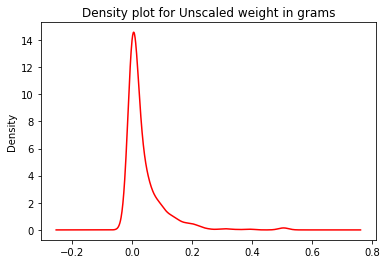

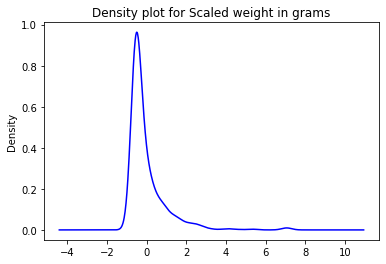

In [ ]:
#weight in grams 

nutrition_subset['scaled_weight_in_grams'] = stats.zscore(nutrition_subset['weight_in_grams'], nan_policy='omit')

#unscaled plot
nutrition_subset.saturared_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled weight in grams')
plt.show()

#scaled plot 
nutrition_subset.scaled_saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled weight in grams')
plt.show()

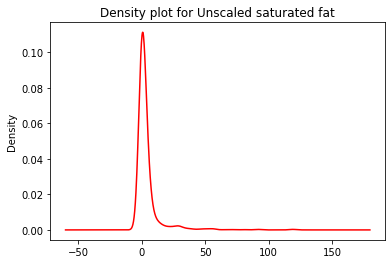

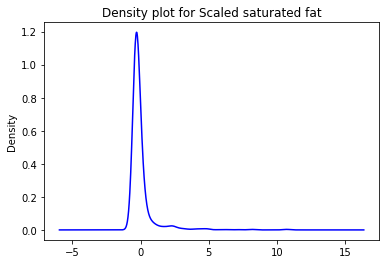

In [ ]:
#saturated fats 

nutrition_subset['scaled_saturated_fat'] = stats.zscore(nutrition_subset['saturated_fat'], nan_policy='omit')

#unscaled plots 
nutrition_subset.saturated_fat.plot.density(color="red")
plt.title('Density plot for Unscaled saturated fat')
plt.show()

#scaled plots
nutrition_subset.scaled_saturated_fat.plot.density(color="blue")
plt.title('Density plot for Scaled saturated fat')
plt.show()

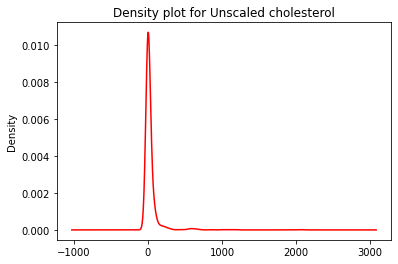

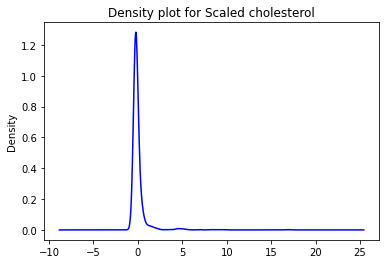

In [ ]:
#cholesterol

nutrition_subset['scaled_cholesterol'] = stats.zscore(nutrition_subset['cholesterol'], nan_policy='omit')

#unscaled plots 
nutrition_subset.cholesterol.plot.density(color="red")
plt.title('Density plot for Unscaled cholesterol')
plt.show()

#scaled plot 
nutrition_subset.scaled_cholesterol.plot.density(color="blue")
plt.title('Density plot for Scaled cholesterol')
plt.show()